In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
test = pd.read_csv("./data/test.csv")
test_shape = test.shape

train = pd.read_csv("./data/train.csv")
train_shape = train.shape

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
sex_pivot = train.pivot_table(index="Sex", values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


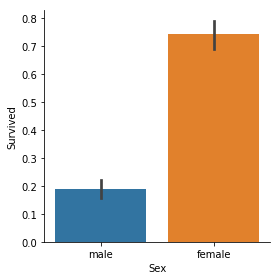

In [17]:
sns.factorplot(x="Sex", y="Survived", data=train, kind="bar")

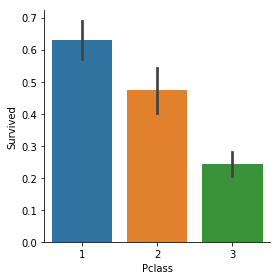

In [19]:
sns.factorplot(x="Pclass", y="Survived", data=train, kind="bar")

In [20]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels=label_names)
    return df

In [21]:
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

In [22]:
train = process_age(train, cut_points, label_names)

In [23]:
test = process_age(train, cut_points, label_names)

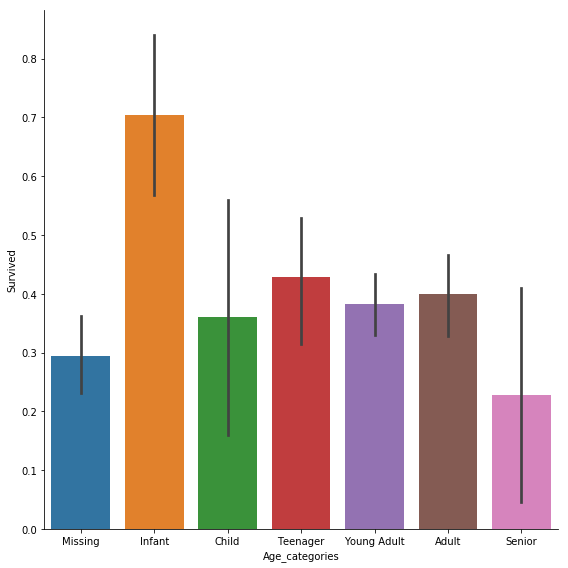

In [32]:
sns.factorplot(x="Age_categories", y="Survived", data=train, kind="bar", size=8)

In [35]:
def create_dummies(df, column_names):
    for column_name in column_names:
        dummies = pd.get_dummies(df[column_name],prefix=column_name)
        df = pd.concat([df,dummies],axis=1)
    return df

In [36]:
train = create_dummies(train, ["Pclass", "Sex", "Age_categories"])
test = create_dummies(test, ["Pclass", "Sex", "Age_categories"])

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [39]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [42]:
lr.fit(X=train[columns], y=train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_X, test_X, train_y, test_y = train_test_split(train[columns], train['Survived'], test_size=0.2, random_state=0)

In [45]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
accuracy

0.81005586592178769

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
lr = LogisticRegression()
cross_val_score(lr, train[columns], train['Survived'], cv=10)

array([ 0.8       ,  0.81111111,  0.7752809 ,  0.87640449,  0.80898876,
        0.78651685,  0.76404494,  0.76404494,  0.83146067,  0.80681818])

In [49]:
lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])
predictions = lr.predict(test[columns])

In [57]:
holdout_ids = test["PassengerId"]
holdout_ids.head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [58]:
submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
submission = pd.DataFrame(submission_df)

In [59]:
submission

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,1


Onto the more optimizations